#Fake News Detector



---



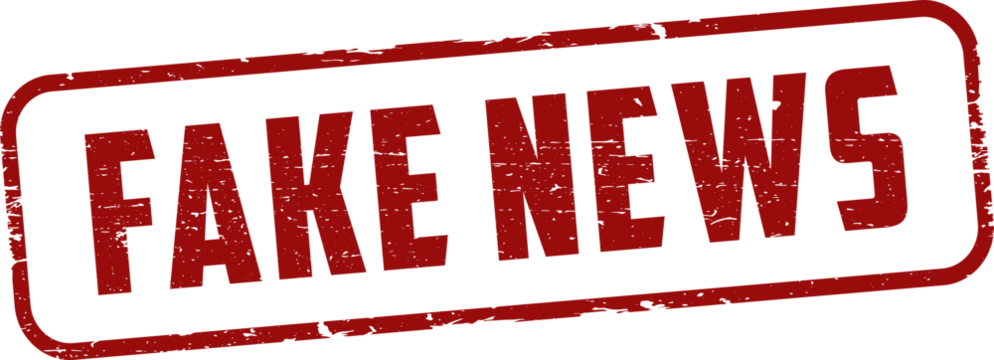



---



###What is Fake News?

A type of yellow journalism, fake news encapsulates pieces of news that may be hoaxes and is generally spread through social media and other online media. This is often done to further or impose certain ideas and is often achieved with political agendas. Such news items may contain false and/or exaggerated claims, and may end up being viralized by algorithms, and users may end up in a filter bubble.

###Detecting Fake News with Python

To build a model to accurately classify a piece of news as REAL or FAKE.

This advanced python project of detecting fake news deals with fake and real news. Using sklearn, we build a TfidfVectorizer on our dataset. Then, we initialize a PassiveAggressive Classifier and fit the model. In the end, the accuracy score and the confusion matrix tell us how well our model fares.


##Steps for detecting fake news with Python

### 1.   Make necessary imports:



In [43]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

### 2. Now, let’s read the data into a DataFrame, and get the shape of the data and the first 5 records.

In [22]:
#Read the data
df=pd.read_csv('/content/news.csv')

#Get shape and head
df.shape
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


### 3. And get the labels from the DataFrame.



In [23]:
#DataFlair - Get the labels
labels=df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

### 4. Split the dataset into training and testing sets.


In [24]:
#DataFlair - Split the dataset
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=7)

### 5. Let’s initialize a TfidfVectorizer with stop words from the English language and a maximum document frequency of 0.7 (terms with a higher document frequency will be discarded). Stop words are the most common words in a language that are to be filtered out before processing the natural language data. And a TfidfVectorizer turns a collection of raw documents into a matrix of TF-IDF features.

In [25]:
#DataFlair - Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

#DataFlair - Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train)
tfidf_test=tfidf_vectorizer.transform(x_test)

### 6. Next, we’ll initialize a PassiveAggressiveClassifier. This is. We’ll fit this on tfidf_train and y_train.



In [26]:
#DataFlair - Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

#DataFlair - Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.9%


### 7. We got an accuracy of 92.82% with this model. Finally, let’s print out a confusion matrix to gain insight into the number of false and true negatives and positives.



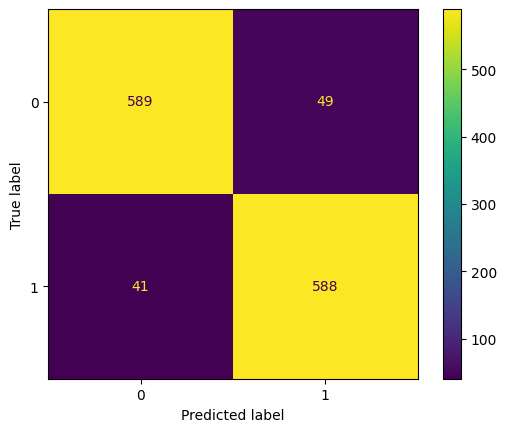

In [46]:
#DataFlair - Build confusion matrix
cf_matrix = confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
disp = ConfusionMatrixDisplay(cf_matrix)
disp.plot()